<a href="https://colab.research.google.com/github/Mehedihasan097/Financial-Engineering/blob/main/Home_Loan_Application_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
application = pd.read_csv('application_train.csv')
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
application.shape

(25233, 122)

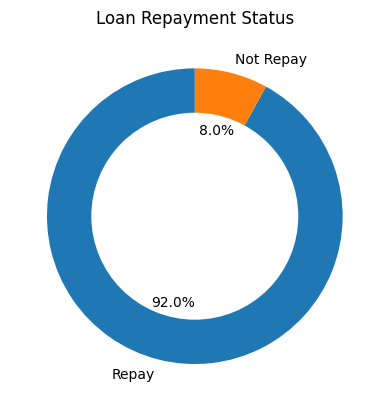

In [ ]:
# Get counts of target values
target_counts = application['TARGET'].value_counts()

# Create figure and axis objects
fig, ax = plt.subplots()

# Create pie chart
labels = ['Repay', 'Not Repay']
pie = ax.pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Create donut chart by drawing white circle in the center
center_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Add title
ax.set_title('Loan Repayment Status')

# Show chart
plt.show()

<Figure size 1000x600 with 0 Axes>

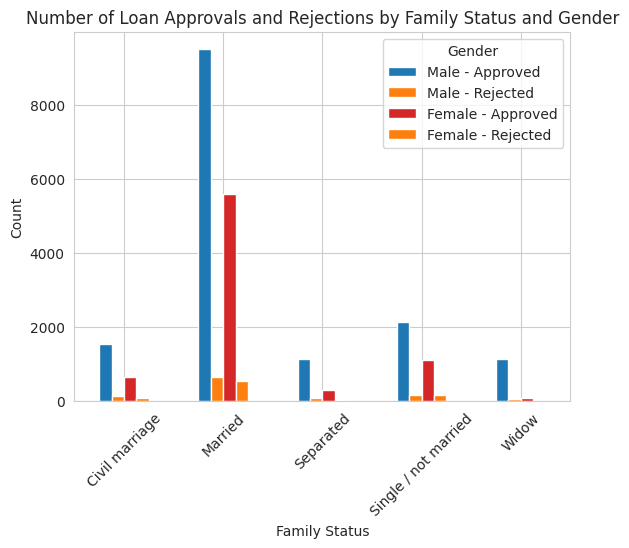

In [ ]:
pivot_table = application.pivot_table(index=['NAME_FAMILY_STATUS'], columns=['CODE_GENDER', 'TARGET'], values='SK_ID_CURR', aggfunc='count')
pivot_table.columns = pivot_table.columns.map(lambda x: f"{x[0]}_{x[1]}")

# create stacked bar chart using pivot table
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = pivot_table.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#d62728', '#ff7f0e'])
ax.set_xlabel('Family Status')
ax.set_ylabel('Count')
ax.set_title('Number of Loan Approvals and Rejections by Family Status and Gender')

# change legend labels
plt.xticks(rotation=45)
plt.legend(title='Gender', labels=['Male - Approved', 'Male - Rejected', 'Female - Approved', 'Female - Rejected'])
plt.show()

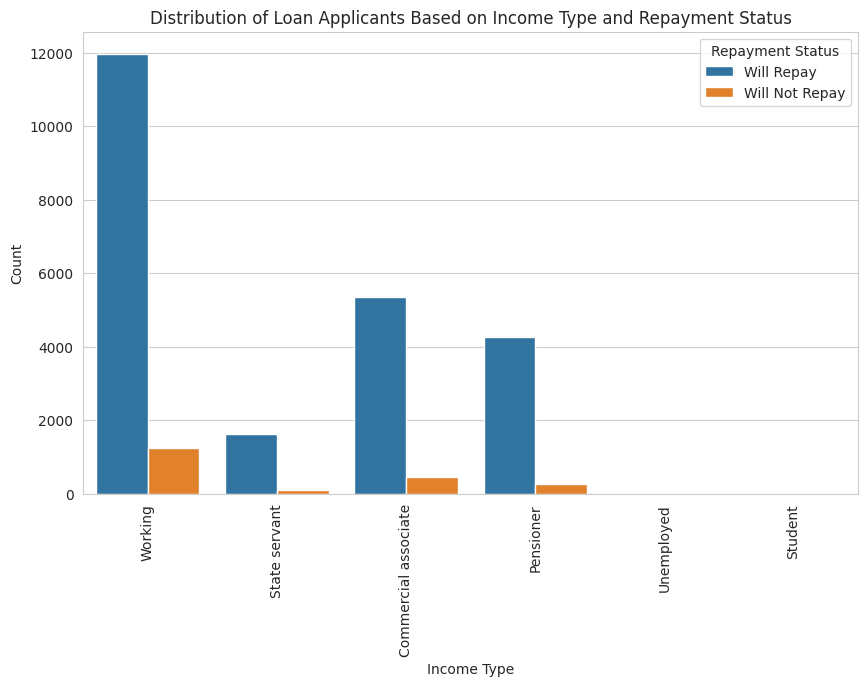

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='NAME_INCOME_TYPE', hue='TARGET', data=application, palette=['#1f77b4', '#ff7f0e'])
ax.set_xlabel('Income Type')
ax.set_ylabel('Count')
ax.set_title('Distribution of Loan Applicants Based on Income Type and Repayment Status')
plt.xticks(rotation=90)

# change legend labels
plt.legend(title='Repayment Status', labels=['Will Repay', 'Will Not Repay'])
plt.show()

<Figure size 1200x600 with 0 Axes>

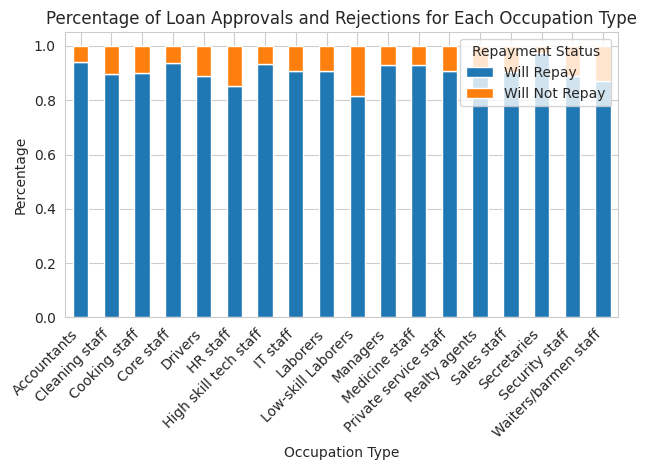

In [ ]:
occupation_counts = pd.pivot_table(application, index='OCCUPATION_TYPE', columns='TARGET', values='SK_ID_CURR', aggfunc='count')

# Calculate the total count for each occupation type
occupation_totals = occupation_counts.sum(axis=1)

# Calculate the percentage of loan approvals and rejections for each occupation type
occupation_pct = occupation_counts.div(occupation_totals, axis=0)

# Create a stacked bar chart showing the percentage of loan approvals and rejections for each occupation type
plt.figure(figsize=(12, 6))
ax = occupation_pct.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
ax.set_xlabel('Occupation Type')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Loan Approvals and Rejections for Each Occupation Type')
plt.legend(title='Repayment Status', labels=['Will Repay', 'Will Not Repay'], loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

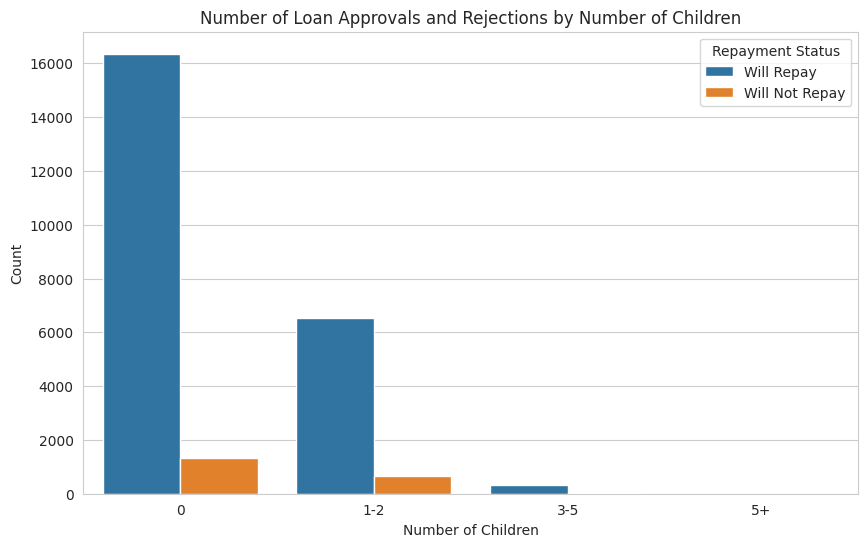

In [ ]:
application['CNT_CHILDREN_GROUP'] = pd.cut(application['CNT_CHILDREN'],
                                                bins=[-1, 0, 2, 5, application['CNT_CHILDREN'].max()],
                                                labels=['0', '1-2', '3-5', '5+'])

# create a stacked bar chart showing the number of loan approvals and rejections for each number of children
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='CNT_CHILDREN_GROUP', hue='TARGET', data=application, palette=['#1f77b4', '#ff7f0e'])
ax.set_xlabel('Number of Children')
ax.set_ylabel('Count')
ax.set_title('Number of Loan Approvals and Rejections by Number of Children')
# change legend labels
plt.legend(title='Repayment Status', labels=['Will Repay', 'Will Not Repay'])
plt.show()

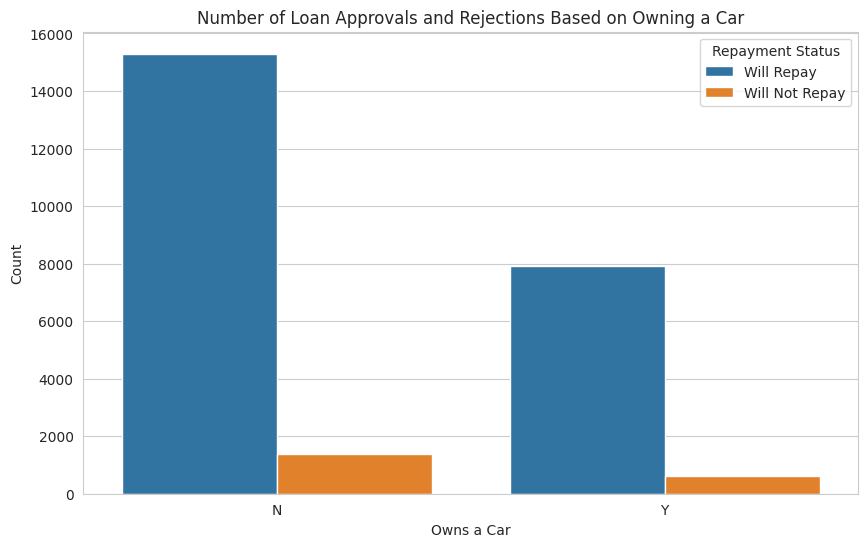

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='FLAG_OWN_CAR', hue='TARGET', data=application, palette=['#1f77b4', '#ff7f0e'])
ax.set_xlabel('Owns a Car')
ax.set_ylabel('Count')
ax.set_title('Number of Loan Approvals and Rejections Based on Owning a Car')

# change legend labels
plt.legend(title='Repayment Status', labels=['Will Repay', 'Will Not Repay'])
plt.show()

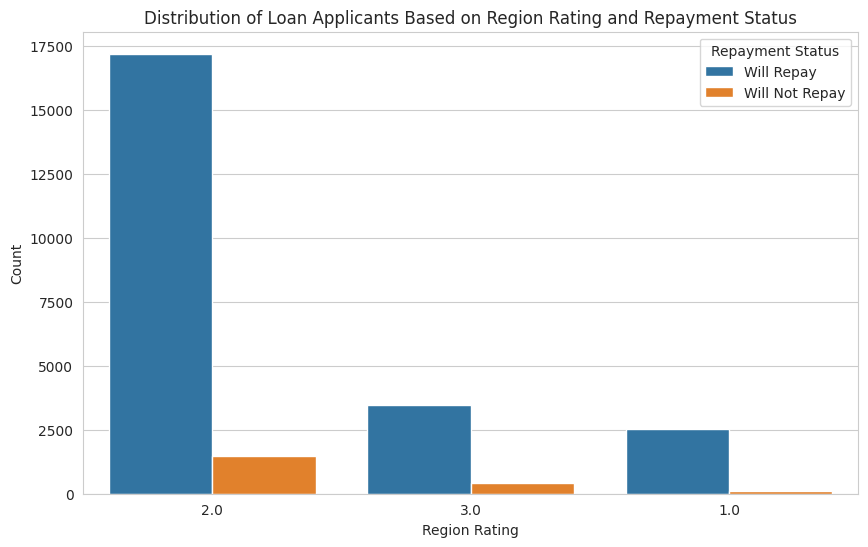

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='REGION_RATING_CLIENT', hue='TARGET', data=application, palette=['#1f77b4', '#ff7f0e'],
                   order=application['REGION_RATING_CLIENT'].value_counts().index)
ax.set_xlabel('Region Rating')
ax.set_ylabel('Count')
ax.set_title('Distribution of Loan Applicants Based on Region Rating and Repayment Status')

# change legend labels
plt.legend(title='Repayment Status', labels=['Will Repay', 'Will Not Repay'])
plt.show()

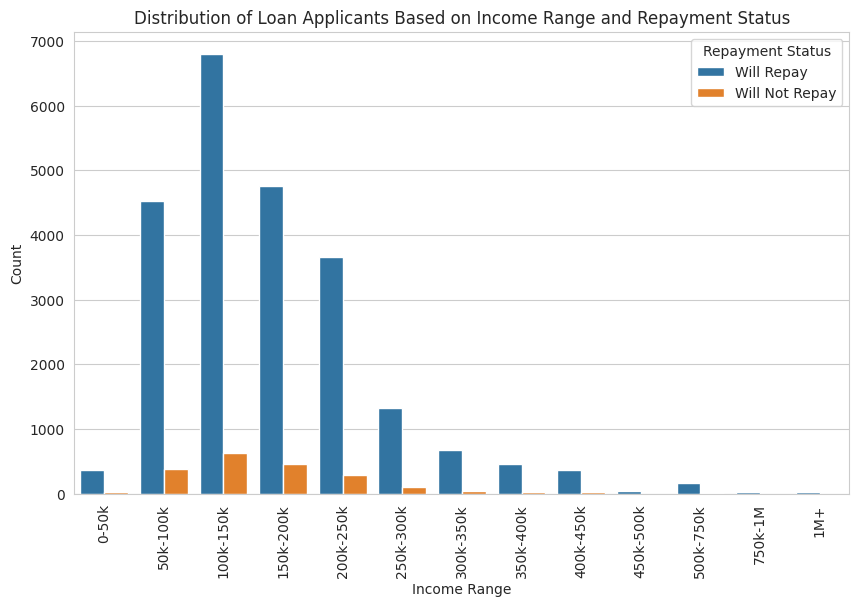

In [ ]:
income_bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 750000, 1000000, np.inf]
income_labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-350k', '350k-400k', '400k-450k', '450k-500k', '500k-750k', '750k-1M', '1M+']

# Create a new column 'INCOME_RANGE' by cutting the AMT_INCOME_TOTAL variable into bins
application['INCOME_RANGE'] = pd.cut(application['AMT_INCOME_TOTAL'], bins=income_bins, labels=income_labels)

# Create the bar chart
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='INCOME_RANGE', hue='TARGET', data=application, palette=['#1f77b4', '#ff7f0e'])
ax.set_xlabel('Income Range')
ax.set_ylabel('Count')
ax.set_title('Distribution of Loan Applicants Based on Income Range and Repayment Status')
plt.xticks(rotation=90)

# Change legend labels
plt.legend(title='Repayment Status', labels=['Will Repay', 'Will Not Repay'])
plt.show()


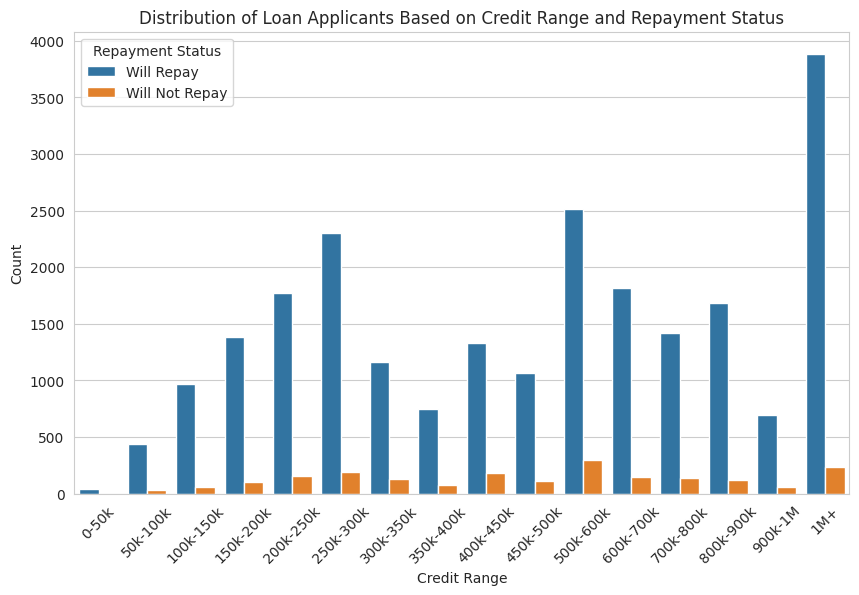

In [ ]:
credit_bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 600000, 700000, 800000, 900000, 1000000, np.inf]
credit_labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-350k', '350k-400k', '400k-450k', '450k-500k', '500k-600k', '600k-700k', '700k-800k', '800k-900k', '900k-1M', '1M+']

# Create a new column 'CREDIT_RANGE' by cutting the AMT_CREDIT variable into bins
application['CREDIT_RANGE'] = pd.cut(application['AMT_CREDIT'], bins=credit_bins, labels=credit_labels)

# Create the bar chart
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='CREDIT_RANGE', hue='TARGET', data=application, palette=['#1f77b4', '#ff7f0e'])
ax.set_xlabel('Credit Range')
ax.set_ylabel('Count')
ax.set_title('Distribution of Loan Applicants Based on Credit Range and Repayment Status')
plt.xticks(rotation=45)

# Change legend labels
plt.legend(title='Repayment Status', labels=['Will Repay', 'Will Not Repay'])
plt.show()


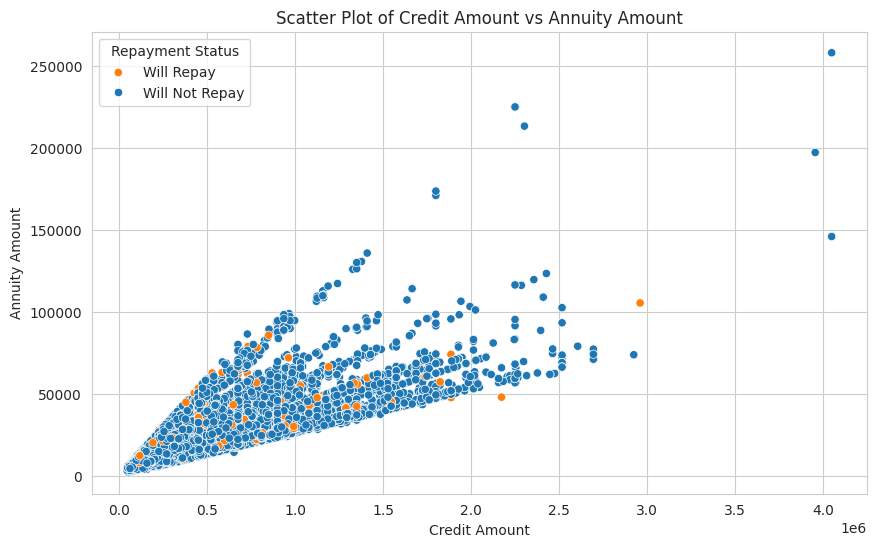

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AMT_CREDIT', y='AMT_ANNUITY', data=application, hue='TARGET', palette=['#1f77b4', '#ff7f0e'])
plt.xlabel('Credit Amount')
plt.ylabel('Annuity Amount')
plt.title('Scatter Plot of Credit Amount vs Annuity Amount')
plt.legend(title='Repayment Status', labels=['Will Repay', 'Will Not Repay'])
plt.show()